# Import Packages

In [1]:
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

Using TensorFlow backend.


# Utility Functions

In [0]:
def modeling(X_train, y_train, X_test, y_test, features, classes, epoch, batch, verbose, dropout):
    
    model = Sequential()
    
    #first layer input dim as number of features
    model.add(Dense(100, activation='relu', input_dim=features))
    model.add(Dropout(dropout))
    model.add(Dense(50, activation='relu'))
    #nodes must be same as no. of labels classes
    model.add(Dense(classes, activation='softmax'))
    
    model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    
    model.fit(X_train, y_train,
              batch_size=batch,
              epochs= epoch, 
              verbose=verbose,
              validation_data=(X_test, y_test))
    
    return model


def split_(df):
    X = df[df.columns[:-1]]
    y = df['fault']
    X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
    return (X_train, X_test, y_train, y_test)
  


def plot_validate(model, loss_acc):
    history = model.history.history

    if loss_acc == 'loss':
      axis_title = 'loss'
      title = 'Loss'
      epoch = len(history['loss'])
    elif loss_acc == 'acc':
      axis_title = 'acc'
      title = 'Accuracy'
      epoch = len(history['loss'])

    plt.figure(figsize=(15,4))
    plt.plot(history[axis_title])
    plt.plot(history['val_' + axis_title])
    plt.title('Model ' + title)
    plt.ylabel(title)
    plt.xlabel('Epoch')

    plt.grid(b=True, which='major')
    plt.minorticks_on()
    plt.grid(b=True, which='minor', alpha=0.2)

    plt.legend(['Train', 'Test'])
    plt.show()
  

# Read Data

## Iris

In [0]:
iris = load_iris()
# Load iris into a dataframe and set the field names
X = pd.DataFrame(iris['data'], columns=iris['feature_names'])
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [4]:
X.shape

(150, 4)

In [5]:
X.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


# Model Training

In [6]:
features = X_train.shape[1]
classes = len(np.unique(y_train))
epoch = 100
batch = 25
verbose = 0
dropout = 0.2

model = modeling(X_train, y_train, X_test, y_test, features, classes, epoch, batch, verbose, dropout)

W0802 05:56:22.490690 139840203081600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0802 05:56:22.531344 139840203081600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0802 05:56:22.538433 139840203081600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0802 05:56:22.553914 139840203081600 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0802 05:56:22.562049 

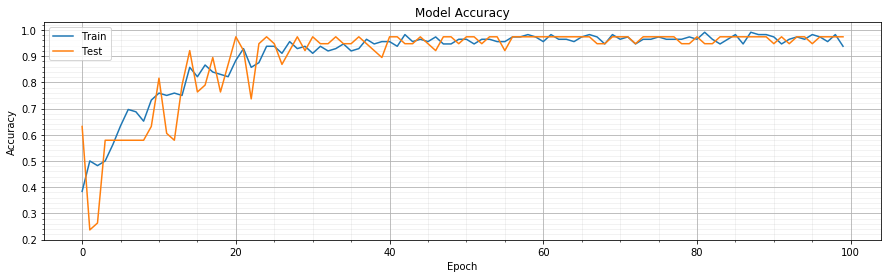

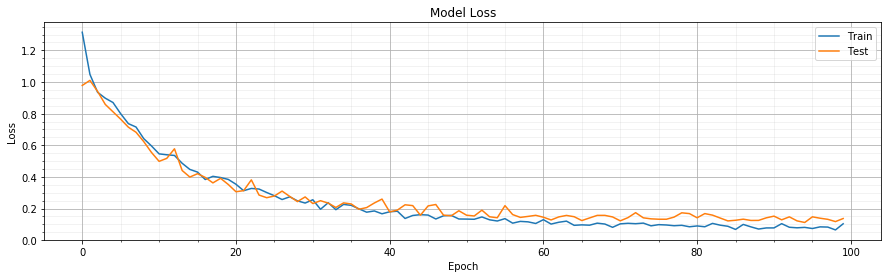

In [7]:
plot_validate(model, 'acc')
plot_validate(model, 'loss')